
# **Gen** ret<strong><font color="red">AI</font></strong>l

Customer search:
* I search flower for **weading.**
* I search flower for **mother day.**
* I search flower for **valentine day.**

Company provide:
* I found the same product <strong><font color="red">contextualized</font></strong> to my search

In [1]:
ZERO_SHOT_PROMPT = '''Product description **PRODUCT** according the **THEMA**
'''

ZERO_SHOT_PROMPT = '''Why this **PRODUCT** is perfect for the special event: **THEMA**
'''

# Init project

In [2]:
# init the google cloud project id

def init_gcloud_(project_id = "ucs-fishfood-8"):
    """
    Initialize the google cloud project id.
    """
    # [START gae_python37_app_init_gcloud]
    !gcloud config set project $project_id

def init_project_genappbuilder():
    """
    Initialize the google cloud project id.
    """
    init_gcloud_(project_id = "ucs-fishfood-8")


def init_project_images():
    """
    Initialize the google cloud project id.
    """
    init_gcloud_(project_id = "cloud-llm-preview4")


def init_project_workstations():
    """
    Initialize the google cloud project id.
    """
    init_gcloud_(project_id = "cloud-workstations-demo-2")

def init_project_ml_api():
    """
    Initialize the google cloud project id.
    """
    init_gcloud_(project_id = "google.com:ml-baguette-demos")

    

# stable diffusion 

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


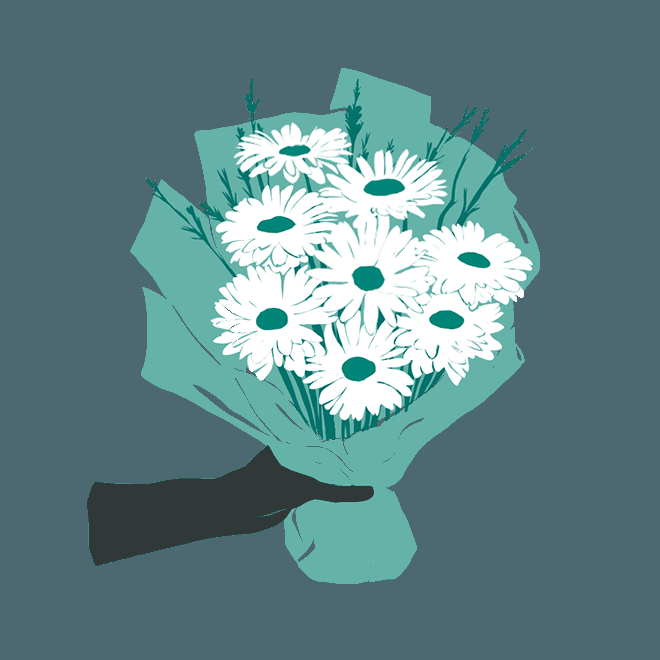

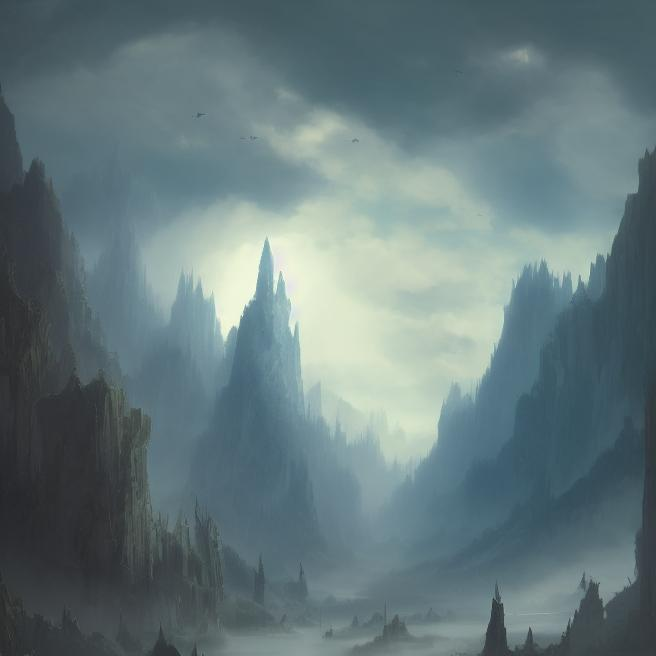

In [12]:
import base64
import glob
import os
from datetime import datetime
from io import BytesIO

import requests
import torch
from google.cloud import aiplatform, storage
from PIL import Image

def download_image(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content)).convert('RGB')


def image_to_base64(image, format="JPEG"):
    buffer = BytesIO()
    image.save(buffer, format=format)
    image_str = base64.b64encode(buffer.getvalue()).decode("utf-8")
    return image_str


def base64_to_image(image_str):
    image = Image.open(BytesIO(base64.b64decode(image_str)))
    return image


endpoint = aiplatform.Endpoint('projects/660199673046/locations/us-central1/endpoints/7168213280727498752')
model = aiplatform.Model('projects/660199673046/locations/us-central1/models/6974081308704112640@1')


init_image = download_image(
    "https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/slider-reassurance-2.png?context=bWFzdGVyfGltYWdlc3wxNDI1NDF8aW1hZ2UvcG5nfGltYWdlcy9oMmUvaGEzLzk1NTQxMTA4NzM2MzAucG5nfDg2YzA5Yjk0YTc5N2FkNTJkZWMyZmM1OGU4Mzc1YzIzYWYwMmZhY2ZjZThlMTQ3NjIzYWVjYTE0ODBhZDg2ZjU"
)
display(init_image)
instances = [
    {
        "prompt": "A fantasy landscape, trending on artstation",
        "image": image_to_base64(init_image),
    },
]
response = endpoint.predict(instances=instances)
images = [base64_to_image(image) for image in response.predictions]
display(images[0])

# Image Gen (not used in the demo)

In [ ]:
PROJECT_ID = "google.com:ml-baguette-demos"  # @param {type:"string"}
REGION = "us-central1"  # @param {type:"string"}
MODEL_NAME = "text-bison@001" # @param {type:"string"}

from google.cloud import aiplatform
print(f"Vertex AI SDK version: {aiplatform.__version__}")

# Initialize Vertex AI SDK
import vertexai
vertexai.init(project=PROJECT_ID, location=REGION)

!curl -X POST \
-H "Authorization: Bearer $(gcloud auth application-default print-access-token)" \
-H "Content-Type: application/json" \
https://us-central1-aiplatform.googleapis.com/ui/projects/google.com:ml-baguette-demos/locations/us-central1/models:upload \
-d '{"model": {"display_name": "vision-generative-model","large_model_reference": {"name": "imagegeneration-001"}}}'

In [ ]:
import requests
gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()

ACCESS_TOKEN = gcloud_token[0]

# This endpoint is what was available from the Private API Documentation
# https://cloud.devsite.corp.google.com/vision-ai/docs/priv/generate-images-api
ENDPOINT_URL = 'projects/66194518407/locations/us-central1/endpoints/4549422873969688576'

# This endpoint below is from the Internal Fishfooding Guide: go/IG-fishfooding
FF_ENDPOINT_URL = 'projects/cloud-lvm-fishfooding/locations/us-central1/endpoints/6988653136307027968'

In [ ]:
import requests
import json
import time

def image_gen_model(prompt, sampleImageSize, sampleCount, endpointType='Prod', seed=None):
  headers = {
      'Authorization': f'Bearer {ACCESS_TOKEN}',
      'Content-Type': 'application/json; charset=UTF-8'
  }
  # Advanced option, try different the seed numbers
  # any random integer number range: (0, 2147483647)
  if seed==None:
    data = {"instances": [{"prompt": prompt}],"parameters": {"sampleImageSize": sampleImageSize,"sampleCount": sampleCount}}
  else:
    # Use & provide a seed, if possible, so that we can reproduce the results when needed.
    data = {"instances": [{"prompt": prompt}],"parameters": {"sampleImageSize": sampleImageSize,"sampleCount": sampleCount, "seed": seed}}

  print(data)
  if endpointType=='Prod':
    # Prod usage
    response = requests.post(f'https://us-central1-aiplatform.googleapis.com/v1/{ENDPOINT_URL}:predict', data=json.dumps(data), headers=headers)
  else:
    # Autopush usage
    response = requests.post(f'https://us-central1-autopush-aiplatform.sandbox.googleapis.com/v1/{FF_ENDPOINT_URL}:predict', data=json.dumps(data), headers=headers)
  return response

In [ ]:
#@title Click `Show code` in the code cell (Don't forget to run this cell). { display-mode: "form" }

sampleImageSize = '1024' #@param {type:"string"}
sampleCount = 6 #@param {type:"integer"}
prompt = 'audacious and whimsical fantasy house shaped like pasion fruit with windows and door, in the desert' #@param {type:"string"}
endpointType = "Fishfood" #@param ["Prod", "Fishfood"]

# Advanced option, try different the seed numbers
# any random integer number range: (0, 2147483647)
seed = None #@param {type:"raw"}

print('sampleImageSize:', sampleImageSize)
print('sampleCount:', sampleCount)
print('prompt', prompt)
print('endpointType', endpointType)
print('seed', seed)

In [ ]:
# Use & provide a seed, if possible, so that we can reproduce the results when needed.
response = image_gen_model(prompt, sampleImageSize, sampleCount, endpointType, seed)
json_response = json.loads(response.text)

try:
  predictions = json_response['predictions']
except:
  print("An error occured calling the API.")
  print("1. Check if response was not blocked based on policy violation, check if the UI behaves the same way...")
  print("2. Try a different prompt to see if that was the problem.\n")
  print(response.text)
  # print(dir(response))

In [ ]:
import requests
import json
import time

def image_gen_model(prompt, sampleImageSize, sampleCount, endpointType='Prod', seed=None):
  init_project_images()
  gcloud_token = !gcloud auth print-access-token
  gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
  ACCESS_TOKEN = gcloud_token[0]

  # This endpoint is what was available from the Private API Documentation
  # https://cloud.devsite.corp.google.com/vision-ai/docs/priv/generate-images-api
  ENDPOINT_URL = 'projects/66194518407/locations/us-central1/endpoints/4549422873969688576'

  # This endpoint below is from the Internal Fishfooding Guide: go/IG-fishfooding
  #FF_ENDPOINT_URL = 'projects/cloud-lvm-fishfooding/locations/us-central1/endpoints/6988653136307027968'

  headers = {
      'Authorization': f'Bearer {ACCESS_TOKEN}',
      'Content-Type': 'application/json; charset=UTF-8'
  }
  # Advanced option, try different the seed numbers
  # any random integer number range: (0, 2147483647)
  if seed==None:
    data = {"instances": [{"prompt": prompt}],"parameters": {"sampleImageSize": sampleImageSize,"sampleCount": sampleCount}}
  else:
    # Use & provide a seed, if possible, so that we can reproduce the results when needed.
    data = {"instances": [{"prompt": prompt}],"parameters": {"sampleImageSize": sampleImageSize,"sampleCount": sampleCount, "seed": seed}}

  print(data)
  #if endpointType=='Prod':
    # Prod usage
  response = requests.post(f'https://us-central1-aiplatform.googleapis.com/v1/{ENDPOINT_URL}:predict', data=json.dumps(data), headers=headers)
  #else:
    # Autopush usage
  #  response = requests.post(f'https://us-central1-autopush-aiplatform.sandbox.googleapis.com/v1/{FF_ENDPOINT_URL}:predict', data=json.dumps(data), headers=headers)
  return response

In [ ]:
#@title Click `Show code` in the code cell (Don't forget to run this cell). { display-mode: "form" }

sampleImageSize = '1024' #@param {type:"string"}
sampleCount = 6 #@param {type:"integer"}
prompt = 'audacious and whimsical fantasy house shaped like pasion fruit with windows and door, in the desert' #@param {type:"string"}
endpointType = "Prod" #@param ["Prod", "Fishfood"]

# Advanced option, try different the seed numbers
# any random integer number range: (0, 2147483647)
seed = None #@param {type:"raw"}

print('sampleImageSize:', sampleImageSize)
print('sampleCount:', sampleCount)
print('prompt', prompt)
print('endpointType', endpointType)
print('seed', seed)

# Use & provide a seed, if possible, so that we can reproduce the results when needed.
response = image_gen_model(prompt, sampleImageSize, sampleCount, endpointType, seed)
json_response = json.loads(response.text)

try:
  predictions = json_response['predictions']
except:
  print("An error occured calling the API.")
  print("1. Check if response was not blocked based on policy violation, check if the UI behaves the same way...")
  print("2. Try a different prompt to see if that was the problem.\n")
  print(response.text)
  # print(dir(response))

# Palm LLM 

#### The `top_k` parameter (range: 0.0 - 40, default 40)

##### What is _top_k_?
`top_k` changes how the model selects tokens for output. A `top_k` of 1 means the selected token is the most probable among all tokens in the model's vocabulary (also called greedy decoding). In contrast, a `top_k` of 3 means that the next token is selected from the top 3 most probable tokens (using temperature). For each token selection step, the `top_k` tokens with the highest probabilities are sampled. Then tokens are further filtered based on `top_p` with the final token selected using temperature sampling.

##### How does _top_k_ affect the response?

Specify a lower value for less random responses and a higher value for more random responses.

For more information on the `top_k` parameter for text models, please refer to the [documentation on model parameters](https://cloud.google.com/vertex-ai/docs/generative-ai/learn/models#text_model_parameters).
                                                                                                                       
#### The `top_p` parameter (range: 0.0 - 1.0, default 0.95)
                                                                                                                       

In [3]:
from vertexai.preview.language_models import TextGenerationModel,\
                                            ChatModel,\
                                            InputOutputTextPair,\
                                            TextEmbeddingModel

from IPython.display import display, Markdown
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

generation_model = TextGenerationModel.from_pretrained("text-bison@001")



def generative_example(text_input, temperature=0.6, top_k=40, top_p=0.9, max_output_tokens=512):
    """Text Generation with a Large Language Model."""
    response = generation_model.predict(
        text_input,
        temperature=temperature,
        top_k=top_k, # default top_k=1
        top_p=top_p, # default top_p=0
        max_output_tokens=max_output_tokens, # default 32
    )
    #print(response.text)
    
    return response

generative_example(ZERO_SHOT_PROMPT.replace('**PRODUCT**',"flower").replace('**THEMA**',"weading") )


Roses are a classic choice for wedding flowers because they are elegant, romantic, and timeless. They come in a variety of colors to match any wedding theme, and they can be arranged in a variety of ways to create stunning centerpieces and bouquets. Roses also have a long history of being associated with love and romance, making them the perfect flower for a wedding day.

# Cloud vision to enrich text prompt

In [4]:
from typing import Sequence

from google.cloud import vision


def analyze_image_from_uri(
    image_uri: str,
    feature_types: Sequence,
) -> vision.AnnotateImageResponse:
    client = vision.ImageAnnotatorClient()

    image = vision.Image()
    image.source.image_uri = image_uri
    features = [vision.Feature(type_=feature_type) for feature_type in feature_types]
    request = vision.AnnotateImageRequest(image=image, features=features)

    response = client.annotate_image(request=request)

    return response


def print_labels(response: vision.AnnotateImageResponse):
    print("LABELS " +"==" * 80)
    for label in response.label_annotations:
        print(
            f"{label.score:4.0%}",
            f"{label.description:5}",
            sep=" | ",
        )
    return response.label_annotations

def print_text(response: vision.AnnotateImageResponse):
    print("TEXT "+"==" * 80)
    for annotation in response.text_annotations:
        vertices = [f"({v.x},{v.y})" for v in annotation.bounding_poly.vertices]
        print(
            f"{repr(annotation.description):42}",
            ",".join(vertices),
            sep=" | ",
        )
        
def print_landmarks(response: vision.AnnotateImageResponse, min_score: float = 0.5):
    print("LANDMARKS " +"==" * 80)
    for landmark in response.landmark_annotations:
        if landmark.score < min_score:
            continue
        vertices = [f"({v.x},{v.y})" for v in landmark.bounding_poly.vertices]
        lat_lng = landmark.locations[0].lat_lng
        print(
            f"{landmark.description:18}",
            ",".join(vertices),
            f"{lat_lng.latitude:.5f}",
            f"{lat_lng.longitude:.5f}",
            sep=" | ",
        )       

def print_objects(response: vision.AnnotateImageResponse):
    print("OBJECTS " +"==" * 80)
    for obj in response.localized_object_annotations:
        nvertices = obj.bounding_poly.normalized_vertices
        print(
            f"{obj.score:4.0%}",
            f"{obj.name:15}",
            f"{obj.mid:10}",
            ",".join(f"({v.x:.1f},{v.y:.1f})" for v in nvertices),
            sep=" | ",
        )   

def print_logos(response: vision.AnnotateImageResponse, min_score: float = 0.5):
    print("LOGO "+"==" * 80)

    for logo in response.logo_annotations:
        if logo.score < min_score:
            continue
        
        print('Logos:')
        print(logo.description)
    
def print_safe(response: vision.AnnotateImageResponse):
    print("SAFE "+"==" * 80)

    safe = response.safe_search_annotation

    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Safe search:')

    print(f'adult: {likelihood_name[safe.adult]}')
    print(f'medical: {likelihood_name[safe.medical]}')
    print(f'spoofed: {likelihood_name[safe.spoof]}')
    print(f'violence: {likelihood_name[safe.violence]}')
    print(f'racy: {likelihood_name[safe.racy]}')

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))    
    

def print_web(response: vision.AnnotateImageResponse):
    print("WEB "+"==" * 80)

    annotations = response.web_detection

    if annotations.best_guess_labels:
        for label in annotations.best_guess_labels:
            print(f'\nBest guess label: {label.label}')

    if annotations.pages_with_matching_images:
        print('\n{} Pages with matching images found:'.format(
            len(annotations.pages_with_matching_images)))

        for page in annotations.pages_with_matching_images:
            print(f'\n\tPage url   : {page.url}')

            if page.full_matching_images:
                print('\t{} Full Matches found: '.format(
                       len(page.full_matching_images)))

                for image in page.full_matching_images:
                    print(f'\t\tImage url  : {image.url}')

            if page.partial_matching_images:
                print('\t{} Partial Matches found: '.format(
                       len(page.partial_matching_images)))

                for image in page.partial_matching_images:
                    print(f'\t\tImage url  : {image.url}')

    if annotations.web_entities:
        print('\n{} Web entities found: '.format(
            len(annotations.web_entities)))

        for entity in annotations.web_entities:
            print(f'\n\tScore      : {entity.score}')
            print(f'\tDescription: {entity.description}')

    if annotations.visually_similar_images:
        print('\n{} visually similar images found:\n'.format(
            len(annotations.visually_similar_images)))

        for image in annotations.visually_similar_images:
            print(f'\tImage url    : {image.url}')

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [5]:
def image_labels (
image_uri = "https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/2FRI-GALLERY-0-1.jpg?frz-width=643&context=bWFzdGVyfGltYWdlc3wyMDkwMjJ8aW1hZ2UvanBlZ3xpbWFnZXMvaGJjL2g4Ny85NTMwNjA5NTk4NDk0LmpwZ3xlM2Y0NmE0YWY3YjQ3MjcyMzRhNmEwOTE3MjY5OTMxOWU1OGQ4ZmU0MWM2ZTI3NDRkODAzNTllOWYyMzVkMTRm"
):
    features = [vision.Feature.Type.LABEL_DETECTION, 
                vision.Feature.Type.LANDMARK_DETECTION, 
                vision.Feature.Type.LOGO_DETECTION,
    #            vision.Feature.Type.SAFE_SEARCH_DETECTION,
                vision.Feature.Type.WEB_DETECTION,
                vision.Feature.Type.TEXT_DETECTION,
                vision.Feature.Type.OBJECT_LOCALIZATION]

    features = [vision.Feature.Type.LABEL_DETECTION] 

    response = analyze_image_from_uri(image_uri, features)
    labels = print_labels(response)
    list_labels = [x.description for x in list(filter(lambda x: (x.score > 0.80 ), labels)) ]

    return list_labels

image_labels()

LABELS ================================================================================================================================================================
 98% | Flower
 95% | Plant
 92% | Vase 
 92% | Flowerpot
 91% | Petal
 83% | Hybrid tea rose
 83% | Creative arts
 83% | Pink 
 80% | Rose 
 79% | Flower Arranging


['Flower',
 'Plant',
 'Vase',
 'Flowerpot',
 'Petal',
 'Hybrid tea rose',
 'Creative arts',
 'Pink']

# Translate API to support multiple input/output languages (only english is supported by Palm actually)
    

In [6]:
!pip install google-cloud-translate==2.0.1

  Using cached google_cloud_core-1.7.3-py2.py3-none-any.whl (28 kB)
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 2.3.2
    Uninstalling google-cloud-core-2.3.2:
      Successfully uninstalled google-cloud-core-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-storage 2.4.0 requires google-cloud-core<3.0dev,>=2.3.0, but you have google-cloud-core 1.7.3 which is incompatible.


In [7]:
def translate_text(target, text):

    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, bytes):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language=target)

    print("Text: {}".format(result["input"]))
    print("Translation: {}".format(result["translatedText"]))
    print("Detected source language: {}".format(result["detectedSourceLanguage"]))
    
    if isinstance(result["translatedText"], bytes):
        print("bytes")
        text = result["translatedText"].decode("utf-8")
        return text
        
    unicode_string = result["translatedText"]
    
    return clean_text(unicode_string)
    
# TODO: Clean me ugly code
def clean_text(s : str):    
    return s.replace("&#39;", "'")

init_project_ml_api()
translate_text( "FR", "The tree is perfect for the special event: wedding because it is covered in beautiful pink flowers. The flowers are a symbol of love and romance, and they make the tree look very elegant and festive. The tree would be a beautiful addition to any wedding ceremony or reception, and it would make a lasting impression on guests.")



Updated property [core/project].
Text: The tree is perfect for the special event: wedding because it is covered in beautiful pink flowers. The flowers are a symbol of love and romance, and they make the tree look very elegant and festive. The tree would be a beautiful addition to any wedding ceremony or reception, and it would make a lasting impression on guests.
Translation: L&#39;arbre est parfait pour l&#39;événement spécial : mariage car il est couvert de belles fleurs roses. Les fleurs sont un symbole d&#39;amour et de romance, et elles donnent à l&#39;arbre un aspect très élégant et festif. L&#39;arbre serait un bel ajout à toute cérémonie de mariage ou réception, et il ferait une impression durable sur les invités.
Detected source language: en


"L'arbre est parfait pour l'événement spécial : mariage car il est couvert de belles fleurs roses. Les fleurs sont un symbole d'amour et de romance, et elles donnent à l'arbre un aspect très élégant et festif. L'arbre serait un bel ajout à toute cérémonie de mariage ou réception, et il ferait une impression durable sur les invités."

# gradio interface used by the demo

In [ ]:
%pip install gradio

In [ ]:
%pip install gradio==3.24

In [ ]:
%pip install --user --upgrade gradio

In [9]:
from gradio_client import Client

genappbuilder_demo_url = "https://8d1409dc40694f6a38.gradio.live"
client_genappbuilder = Client(genappbuilder_demo_url)

client_genappbuilder.view_api()

client_genappbuilder.predict("fleur",  fn_index=0)


Loaded as API: https://8d1409dc40694f6a38.gradio.live ✔
Client.predict() Usage Info
---------------------------
Named API endpoints: 0

Unnamed API endpoints: 1

 - predict(query, fn_index=0) -> (title, link, snippet, description, image)
    Parameters:
     - [Textbox] query: str 
    Returns:
     - [Textbox] title: str 
     - [Textbox] link: str 
     - [Textbox] snippet: str 
     - [Textbox] description: str 
     - [Textbox] image: str 



('Interflora : livraison de fleurs à domicile en 4H',
 'https://www.interflora.fr/',
 'Découvrez nos bouquets de fleurs dès 22,95€. Livraison dans toute la France dès 6,95€, en 4H à Paris. Livraison 7J/7, dimanche et les jours fériés.',
 'Découvrez nos bouquets de fleurs dès 22,95€. Livraison dans toute la France dès 6,95€, en 4H à Paris. Livraison 7J/7, dimanche et les jours fériés',
 'https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/Bandeau-principal-MothersDay2023-Octopus-02.jpg?context=bWFzdGVyfHJvb3R8MjIwMjIwfGltYWdlL2pwZWd8aGIwL2gzZC85NTc5NzE5OTgzMTM0LmpwZ3wxMDg1YjM1Y2E0NDkzMDk1NWRhMTg0ODViNWU5YzBlYTk2OTk2ZDI3OTE5ODc2MjNiY2M3NDMyYmZjNTdjMGJl')

In [10]:
html = """
<div class="PushMomentsFirst-picture"><picture class="BlockPicture BlockResizePicture"><source srcset="https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/Bandeau-principal-MothersDay2023-Octopus-02.jpg?frz-width=640&amp;frz-height=450&amp;frz-gravity=center&amp;frz-enlarge=true&amp;context=bWFzdGVyfHJvb3R8MjIwMjIwfGltYWdlL2pwZWd8aGIwL2gzZC85NTc5NzE5OTgzMTM0LmpwZ3wxMDg1YjM1Y2E0NDkzMDk1NWRhMTg0ODViNWU5YzBlYTk2OTk2ZDI3OTE5ODc2MjNiY2M3NDMyYmZjNTdjMGJl 1x" media="(max-width: 639px)"><source srcset="https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/Bandeau-principal-MothersDay2023-Octopus-02.jpg?frz-width=959&amp;frz-height=450&amp;frz-gravity=center&amp;frz-enlarge=true&amp;context=bWFzdGVyfHJvb3R8MjIwMjIwfGltYWdlL2pwZWd8aGIwL2gzZC85NTc5NzE5OTgzMTM0LmpwZ3wxMDg1YjM1Y2E0NDkzMDk1NWRhMTg0ODViNWU5YzBlYTk2OTk2ZDI3OTE5ODc2MjNiY2M3NDMyYmZjNTdjMGJl 1x" media="(max-width: 959px)"><source srcset="https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/Bandeau-principal-MothersDay2023-Octopus-02.jpg?frz-width=1600&amp;frz-height=450&amp;frz-gravity=center&amp;frz-enlarge=true&amp;context=bWFzdGVyfHJvb3R8MjIwMjIwfGltYWdlL2pwZWd8aGIwL2gzZC85NTc5NzE5OTgzMTM0LmpwZ3wxMDg1YjM1Y2E0NDkzMDk1NWRhMTg0ODViNWU5YzBlYTk2OTk2ZDI3OTE5ODc2MjNiY2M3NDMyYmZjNTdjMGJl 1x" media="(min-width: 960px)"> <img src="https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/Bandeau-principal-MothersDay2023-Octopus-02.jpg?context=bWFzdGVyfHJvb3R8MjIwMjIwfGltYWdlL2pwZWd8aGIwL2gzZC85NTc5NzE5OTgzMTM0LmpwZ3wxMDg1YjM1Y2E0NDkzMDk1NWRhMTg0ODViNWU5YzBlYTk2OTk2ZDI3OTE5ODc2MjNiY2M3NDMyYmZjNTdjMGJl" alt="Fête des Mères Dimanche 4 juin" width="480" height="480" fetchpriority="high"></picture></div>
"""

In [16]:
import requests
import gradio as gr
from PIL import Image
import time

URL = "https://source.unsplash.com/random/500x500/?nature,fruit"

URL = "https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/2FRI-GALLERY-0-1.jpg?frz-width=643&context=bWFzdGVyfGltYWdlc3wyMDkwMjJ8aW1hZ2UvanBlZ3xpbWFnZXMvaGJjL2g4Ny85NTMwNjA5NTk4NDk0LmpwZ3xlM2Y0NmE0YWY3YjQ3MjcyMzRhNmEwOTE3MjY5OTMxOWU1OGQ4ZmU0MWM2ZTI3NDRkODAzNTllOWYyMzVkMTRm"


js_pos_select = """
async (images_selected_state) => {
  const gallery = document.querySelector("#gallery_id")
  const buttons_thumbnails = gallery.querySelectorAll(".thumbnails > button");
  const buttons_large = gallery.querySelectorAll(".grid-container > button");
  buttons_thumbnails.forEach((btn, idx) => {
    if(images_selected_state.includes(idx)){
      btn.classList.add('selected-custom');
    }else{
      btn.classList.remove('selected-custom');
    }
  })
  buttons_large.forEach((btn, idx) => {
    if(images_selected_state.includes(idx)){
      btn.classList.add('selected-custom');
    }else{
      btn.classList.remove('selected-custom');
    }
  })
  return images_selected_state
}
"""
css = """
.selected-custom {
    --ring-color: red !important;
    transform: scale(0.9) !important;
    border-color: red !important;
}
"""
def get_random_images(n=1):
    images = []
    #  for i in range(n):
    images.append(Image.open(requests.get(URL , stream=True).raw))
    return images

def get_select_index(imgs_set, evt: gr.SelectData):
  print(evt.index)
  if(evt.index in imgs_set):
    imgs_set.pop(imgs_set.index(evt.index))
  else:
    imgs_set.append(evt.index)
  print(imgs_set)
  return imgs_set

with gr.Blocks(css=css) as demo:
    images_selected_state = gr.JSON([], visible=False)

    with gr.Column(variant="panel"):
        with gr.Row(variant="compact"):
            btn = gr.Button("Generate image").style(full_width=False)

        gallery_photos = gr.Gallery(
            label="Generated images", show_label=False, elem_id="gallery_id"
        ).style(columns=[4], rows=[2], object_fit="contain", height="auto")

    gallery_photos.select(
        get_select_index, images_selected_state, images_selected_state).then(
        None, images_selected_state, None, _js=js_pos_select)
    demo.load(get_random_images, None, gallery_photos)

#demo.launch(debug=True, share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://69db44fc4a2963b21d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Title:  Bonsaï Pinus Tree | Interflora | Livraison plantes vertes d'extérieur
Link:  https://www.interflora.fr/p/plante-bonsai-pinus-tree/0/FR
Description:  Bonsaï Pinus Tree | Livraison plantes vertes d'extérieur | Plantes vertes | Livraison en moins de 24h
Snippet:  Bonsaï Pinus Tree. Livraison par un transporteur. C'est vous qui choisissez. Avec cache pot. 39,95€. Diamètre du pot: 16cm. Hauteur de la plante: entre 35cm ...
Image:  https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/slider-reassurance-2.png?context=bWFzdGVyfGltYWdlc3wxNDI1NDF8aW1hZ2UvcG5nfGltYWdlcy9oMmUvaGEzLzk1NTQxMTA4NzM2MzAucG5nfDg2YzA5Yjk0YTc5N2FkNTJkZWMyZmM1OGU4Mzc1YzIzYWYwMmZhY2ZjZThlMTQ3NjIzYWVjYTE0ODBhZDg2ZjU
LABELS ================================================================================================================================================================
 93% | Plant
 87% | Sleeve
 85% | T-shirt
 80% | Font 
 80% | Art  
 71% | Pattern
 69% | Fictional character
 66% | Gra

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


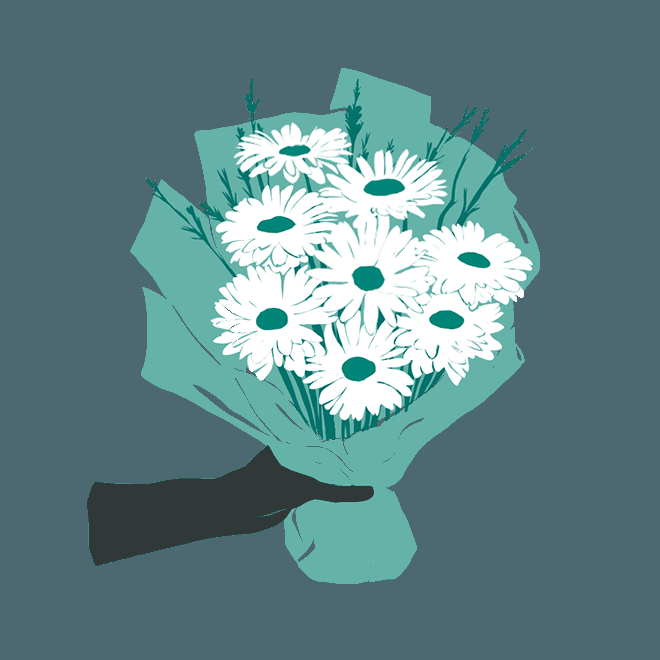

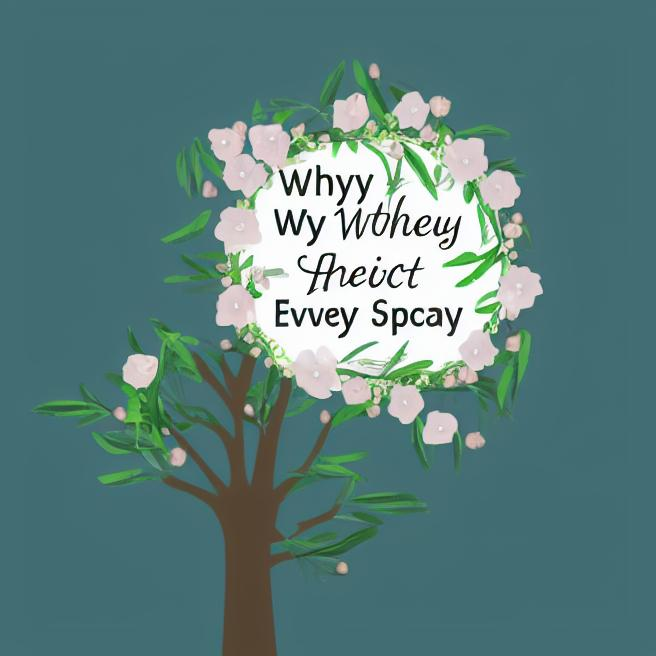

Title:  Fleuriste L'ARBRE (ROUZEDE) – Livraison de fleurs L'ARBRE ...
Link:  https://www.interflora.fr/fleuristes/Charente-16/L-ARBRE-ROUZEDE-16290001
Description:  INTERFLORA. Faire livrer un superbe bouquet de fleurs rapidement par un des artisans fleuristes INTERFLORA. Bouquet dés 24,90€ remis en main propre sous 4H
Snippet:  Les fleuristes Interflora assurent la livraison de fleurs à L'arbre (rouzede). Bouquet de fleurs livré en mains propres, 7j/7, par un fleuriste à L'arbre ...
Image:  https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/6G02W-THUMBMAY-PRIMARY-0-1.png?context=bWFzdGVyfGltYWdlc3wyNjExNzh8aW1hZ2UvcG5nfGltYWdlcy9oMzcvaGJlLzk0NDE5MTU4NjMwNzAucG5nfDU2NzgzODk4MmEzZmE5MThmYjk2MjdmMjdjZDBkYjMwYmY0MTkyZDQ2ZDcyMmE4MDg5ZGM0NGE5NjA1NTM4MjA
LABELS ================================================================================================================================================================
 96% | Flower
 92% | Plant
 91% | Petal
 82% | Twig 
 8

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


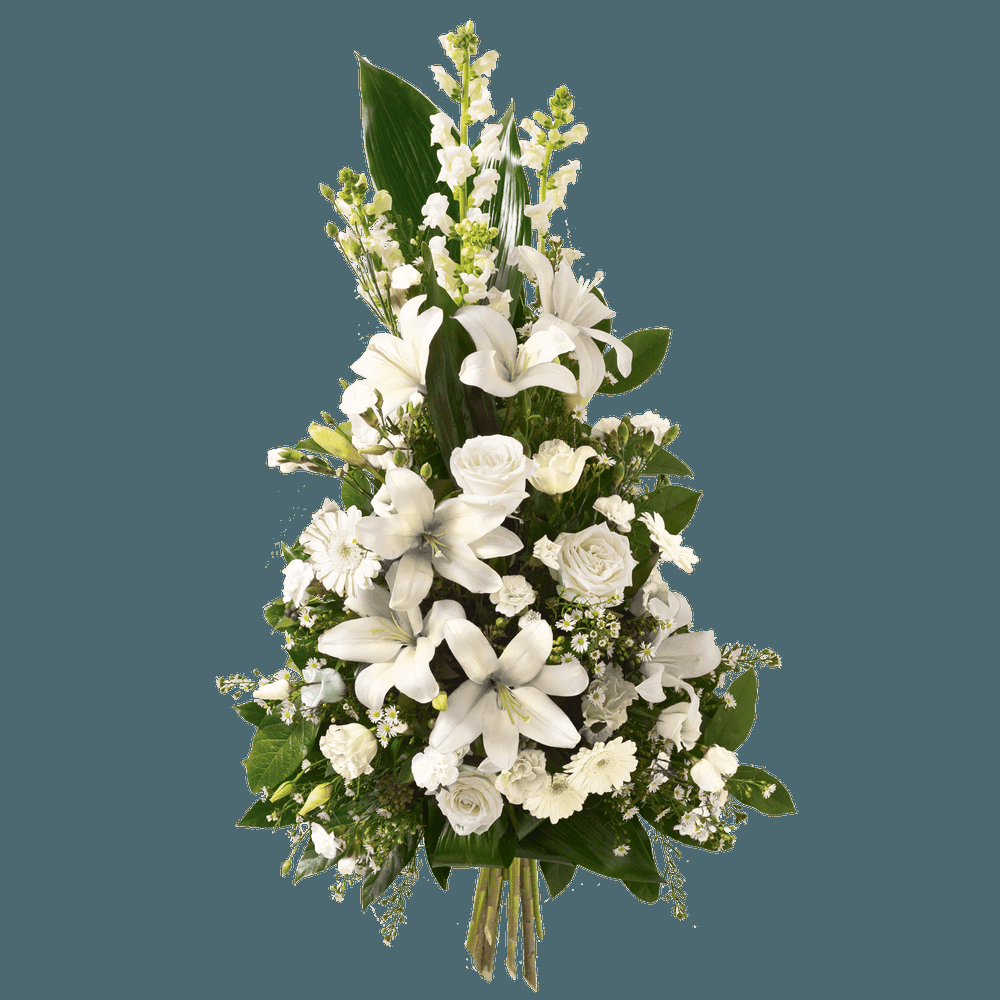

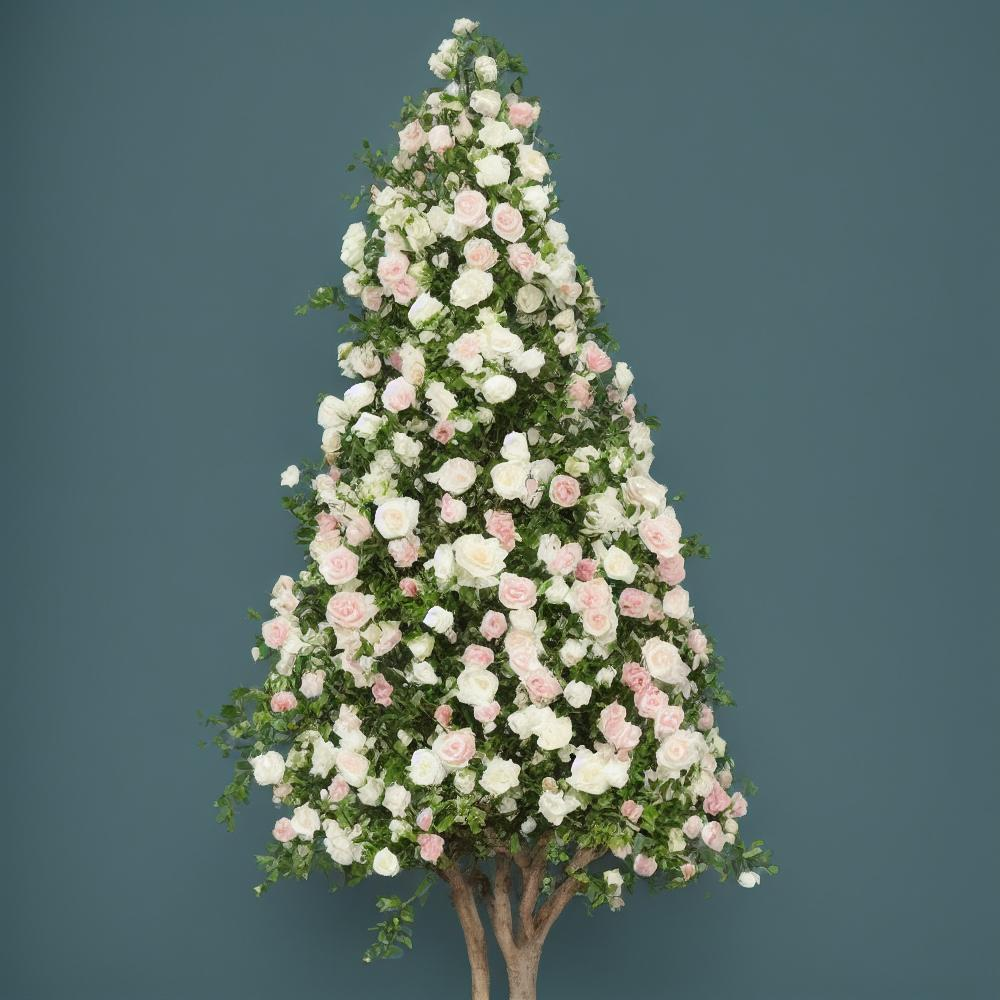

In [ ]:
import gradio as gr
import base64
import numpy as np
import math
from matplotlib import pyplot as plt
import requests
from PIL import Image


gcloud_token = !gcloud auth print-access-token
gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()

ACCESS_TOKEN = gcloud_token[0]

endpointType = "Prod" #@param ["Prod", "Fishfood"]
seed=0

def update(search,
           theme,
           language,
           temperature,
           top_k,
           top_p,
           max_output_tokens,
           endpointType='Prod' #,           seed=None
          ):
    
    title, link, snippet, description, image = client_genappbuilder.predict(search,  fn_index=0)
    print("Title: ", title)
    print("Link: ", link)
    print("Description: ", description)
    print("Snippet: ", snippet)
    print("Image: ", image)
    
    images = []
  
    images.append(Image.open(requests.get(image , stream=True).raw))

    #image_uri = "https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/2FRI-GALLERY-0-1.jpg?frz-width=643&context=bWFzdGVyfGltYWdlc3wyMDkwMjJ8aW1hZ2UvanBlZ3xpbWFnZXMvaGJjL2g4Ny85NTMwNjA5NTk4NDk0LmpwZ3xlM2Y0NmE0YWY3YjQ3MjcyMzRhNmEwOTE3MjY5OTMxOWU1OGQ4ZmU0MWM2ZTI3NDRkODAzNTllOWYyMzVkMTRm"

    list_labels = image_labels(image)
    prompt = (ZERO_SHOT_PROMPT.replace('**PRODUCT**',search).replace('**THEMA**',theme) + " with the labels: "+ ", ".join(list_labels))
    
    
    print(prompt)
    print(temperature)
    print(float(temperature))
    response = generative_example(prompt, temperature=float(temperature), top_k=top_k, top_p=top_p, max_output_tokens=max_output_tokens)

    print(response.text)
    
    if response._prediction_response[0][0]['safetyAttributes']['blocked'] == True:
        print("Function not available")
    else:
        print("LLM answer: \n",response.text)    

    import pandas as pd
    safety_categories = response._prediction_response[0][0]['safetyAttributes']['categories']
    safety_scores = response._prediction_response[0][0]['safetyAttributes']['scores']
    safety_blocked = response._prediction_response[0][0]['safetyAttributes']['blocked']

    safety_attributes_df = pd.DataFrame(list(zip(safety_categories, safety_scores)), columns =['categories', 'scores'])
    print(safety_attributes_df)

    
    composition = "Composition: \n" + ", ".join(list_labels)
    desc = response.text
    
    if len(language) > 1:
        desc = translate_text(language, response.text)
        composition = translate_text(language, composition)
    
    prompt_img = (ZERO_SHOT_PROMPT.replace('**PRODUCT**',search).replace('**THEMA**',theme) )
    init_image = download_image(  image    )
    display(init_image)
    instances = [
    {
    "prompt": prompt_img,
    "image": image_to_base64(init_image),
    },
    ]
    response = endpoint.predict(instances=instances)
    gen_images = [base64_to_image(image) for image in response.predictions]
    display(gen_images[0])
    images.append(gen_images[0])
        
    return desc, composition , images

## TODO: Ajouter bannière
# bugfix utf8
# affichage image fleur
import gradio as gr



theme_demo = gr.themes.Soft(
    secondary_hue="blue",
    font=[gr.themes.GoogleFont('Source Sans Pro'), 'ui-sans-serif', 'system-ui', 'sans-serif'],
).set(
    background_fill_primary='white',
    shadow_drop='rgba(0,0,0,0.05) 0px 1px 2px 0px',
    shadow_drop_lg='0 1px 3px 0 rgb(0 0 0 / 0.1), 0 1px 2px -1px rgb(0 0 0 / 0.1)',
    shadow_spread='3px',
    block_background_fill='*background_fill_primary',
    block_border_width='1px',
    block_border_width_dark='1px',
    block_label_background_fill='*background_fill_primary',
    block_label_background_fill_dark='*background_fill_secondary',
    block_label_text_color='*neutral_500',
    block_label_text_color_dark='*neutral_200',
    block_label_margin='0',
    block_label_padding='*spacing_sm *spacing_lg',
    block_label_radius='calc(*radius_lg - 1px) 0 calc(*radius_lg - 1px) 0',
    block_label_text_size='*text_sm',
    block_label_text_weight='400',
    block_title_background_fill='none',
    block_title_background_fill_dark='none',
    block_title_text_color='*neutral_500',
    block_title_text_color_dark='*neutral_200',
    block_title_padding='0',
    block_title_radius='none',
    block_title_text_weight='400',
    panel_border_width='0',
    panel_border_width_dark='0',
    checkbox_background_color_selected='*secondary_600',
    checkbox_background_color_selected_dark='*secondary_600',
    checkbox_border_color='*neutral_300',
    checkbox_border_color_dark='*neutral_700',
    checkbox_border_color_focus='*secondary_500',
    checkbox_border_color_focus_dark='*secondary_500',
    checkbox_border_color_selected='*secondary_600',
    checkbox_border_color_selected_dark='*secondary_600',
    checkbox_border_width='*input_border_width',
    checkbox_shadow='*input_shadow',
    checkbox_label_background_fill_selected='*checkbox_label_background_fill',
    checkbox_label_background_fill_selected_dark='*checkbox_label_background_fill',
    checkbox_label_shadow='none',
    checkbox_label_text_color_selected='*checkbox_label_text_color',
    input_background_fill='*neutral_100',
    input_border_color='*border_color_primary',
    input_shadow='none',
    input_shadow_dark='none',
    input_shadow_focus='*input_shadow',
    input_shadow_focus_dark='*input_shadow',
    slider_color='auto',
    slider_color_dark='auto',
    button_shadow='none',
    button_shadow_active='none',
    button_shadow_hover='none',
    button_primary_background_fill='*primary_200',
    button_primary_background_fill_hover='*button_primary_background_fill',
    button_primary_background_fill_hover_dark='*button_primary_background_fill',
    button_primary_text_color='*primary_600',
    button_secondary_background_fill='*neutral_200',
    button_secondary_background_fill_hover='*button_secondary_background_fill',
    button_secondary_background_fill_hover_dark='*button_secondary_background_fill',
    button_secondary_text_color='*neutral_700',
    button_cancel_background_fill_hover='*button_cancel_background_fill',
    button_cancel_background_fill_hover_dark='*button_cancel_background_fill'
)


#with gr.Blocks(theme=gr.themes.Default(primary_hue=gr.themes.colors.red, secondary_hue=gr.themes.colors.pink)) as demo_genretail:

def Load_images(urls = ["https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/2FRI-GALLERY-0-1.jpg?frz-width=643&context=bWFzdGVyfGltYWdlc3wyMDkwMjJ8aW1hZ2UvanBlZ3xpbWFnZXMvaGJjL2g4Ny85NTMwNjA5NTk4NDk0LmpwZ3xlM2Y0NmE0YWY3YjQ3MjcyMzRhNmEwOTE3MjY5OTMxOWU1OGQ4ZmU0MWM2ZTI3NDRkODAzNTllOWYyMzVkMTRm"]):
    images = []    
    for url in urls:
        images.append(Image.open(requests.get(url , stream=True).raw))
    return images

def get_select_index(imgs_set, evt: gr.SelectData):
    print(evt.index)
    if(evt.index in imgs_set):
        imgs_set.pop(imgs_set.index(evt.index))
    else:
        imgs_set.append(evt.index)
    print(imgs_set)
    return imgs_set


    
with gr.Blocks(theme=theme_demo) as demo_genretail:

    demo_genretail.theme = theme_demo
    
    header = gr.HTML(html)
#    gr.Markdown
    md = (    """

# **Gen** ret<strong><font color="red">AI</font></strong>l

Customer search:
* I search flower for **weading.**
* I search flower for **mother day.**
* I search flower for **valentine day.**


Company provide:
* I found the same product <strong><font color="red">contextualized</font></strong> to my search
    """)

    image_uri = "https://medias.interflora.fr/fstrz/r/s/c/medias.interflora.fr/medias/2FRI-GALLERY-0-1.jpg?frz-width=643&context=bWFzdGVyfGltYWdlc3wyMDkwMjJ8aW1hZ2UvanBlZ3xpbWFnZXMvaGJjL2g4Ny85NTMwNjA5NTk4NDk0LmpwZ3xlM2Y0NmE0YWY3YjQ3MjcyMzRhNmEwOTE3MjY5OTMxOWU1OGQ4ZmU0MWM2ZTI3NDRkODAzNTllOWYyMzVkMTRm"
    images = []
  
    images.append(Image.open(requests.get(image_uri , stream=True).raw))

    #
    
    
    with gr.Row():
        with gr.Column():
            search = gr.Textbox(label="Search a product", placeholder="Try: Flower, tree, Bouquets, Roses... ")
            theme = gr.Textbox(label="Thema", placeholder="Try: weading, mother day, valentine days, Anniversary, Marriage, For pleasure, Congratulation, Birth...")
            
            language= gr.Textbox(label="Description language", placeholder="Try: FR, ES, NL, EN...")

            gallery_photos = gr.Gallery(
                label="Generated images", show_label=False, elem_id="gallery_id"
                ).style(columns=[2], rows=[2], object_fit="contain", height="auto")

            images_selected_state = gr.JSON([], visible=False)

            gallery_photos.select(
                get_select_index, images_selected_state, images_selected_state).then(
                None, images_selected_state, None, _js=js_pos_select)

            with gr.Accordion("Destination prompt advanced settings", open=False):
                gr.Markdown("Make changes to the destination prompt default settings")
                temperature = gr.Slider(0, 1, 0.3, label="temperature")
                top_k = gr.Slider(0, 40, 40, label="top_k")
                top_p = gr.Slider(0, 1, 1, label="top_p")
                max_output_tokens = gr.Slider(0, 1024, 700, label="max_output_tokens")
                


        with gr.Column():
            btn = gr.Button("Run")
            product_desc_prompt_out = gr.Textbox(label="Product description")
            product_composition_prompt_out = gr.Textbox(label="Product composition")
            
            product_images = gr.Gallery(label="Generated images", show_label=False, elem_id="gallery").style(columns=[3], rows=[2], object_fit="contain", height="auto")


    
    product_photo_prompt_out = "test"
            
    inputs_array = [search,
                    theme,
                    language,
                    temperature,                    
                    top_k,
                    top_p,
                    max_output_tokens]
    
    outputs_array = [product_desc_prompt_out ,
                     product_composition_prompt_out,
                     product_images
                     #, product_photo_prompt_out
#                                ,gr.Textbox(label="Image Generated Prompt")
#                         , product_images
                         ]
    
    
    demo_genretail.load(Load_images, None, gallery_photos)
    

    btn.click(fn=update, inputs=inputs_array, outputs=outputs_array )
    
    

    
    #, examples=["genAI/examples/B2BDP-GALLERY-0-1.jpg", "examples/B2BDP-GALLERY-0-1.jpg", "genAI/examples/B5CL-GALLERY-0-2.jpg"])
    
    
 
demo_genretail.launch(share=True, debug=True)

#if __name__ == "__main__":
    # Set debug=True in Colab for live debugging
    # To create a public link, set `share=True` in `launch()`.

#    demo_genretail.launch(share=True, debug=True)
#     demo.launch(debug=True)

# 

In [ ]:
from google.cloud import aiplatform

aiplatform.init(project=PROJECT_ID, location=REGION, staging_bucket=GCS_BUCKET)